In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zigzag import peak_valley_pivots

# Simple 1st test with zigzag-library

In [2]:
X = np.cumprod(1 + np.random.randn(100) * 0.01)
pivots = peak_valley_pivots(X, 0.03, -0.03)

In [3]:
def plot_pivots(X, pivots):
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

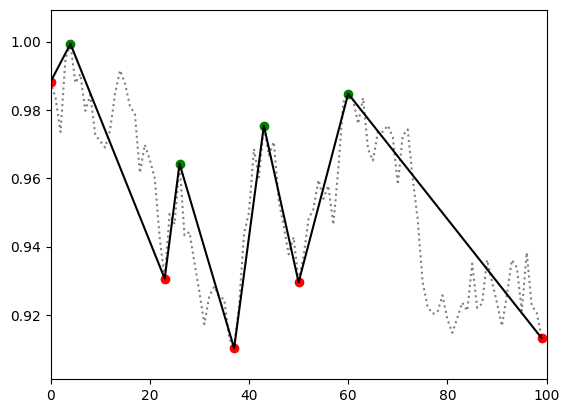

In [4]:
plot_pivots(X, pivots)

In [5]:
pivots

array([-1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1])

# Test with DJI

In [6]:
df = pd.read_excel("data/IR_data.xlsx", skiprows=3, index_col=0, parse_dates=True)
df.tail()

,Dow Jones Industrial Average,S&P 500 INDEX,NASDAQ Composite Index,"United States, Policy Rates, Target Rates, Federal Funds Target Rate, Mid-point","United States, Policy Rates, Target Rates, Federal Funds Target Rate, Upper Band","United States, Policy Rates, Target Rates, Federal Funds Target Rate, Lower Band",US Generic Govt 10 Yr
2022-12-12,34005.04,3990.56,11143.74,3.875,4.0,3.75,3.6113
2022-12-13,34108.64,4019.65,11256.81,3.875,4.0,3.75,3.5012
2022-12-14,33966.35,3995.32,11170.89,3.875,4.0,3.75,3.4774
2022-12-15,33202.22,3895.75,10810.53,4.375,4.5,4.25,3.4463
2022-12-16,32920.46,3852.36,10705.41,4.375,4.5,4.25,3.4822


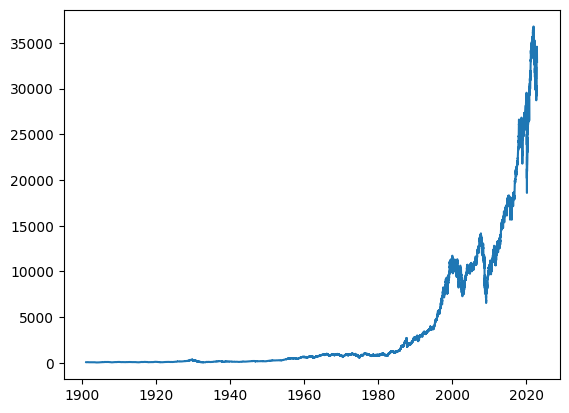

In [7]:
plt.plot(df["Dow Jones Industrial Average"])
plt.show()

In [8]:
c0 = df.index.to_series().between('2010-01-01', '2020-01-01')

sdf = df[c0]
sdf = sdf["Dow Jones Industrial Average"]
sdf

2010-01-01    10428.05
2010-01-04    10583.96
2010-01-05    10572.02
2010-01-06    10573.68
2010-01-07    10606.86
                ...   
2019-12-26    28621.39
2019-12-27    28645.26
2019-12-30    28462.14
2019-12-31    28538.44
2020-01-01    28538.44
Name: Dow Jones Industrial Average, Length: 2609, dtype: float64

In [9]:
pivots = peak_valley_pivots(sdf, 0.05, -0.05)

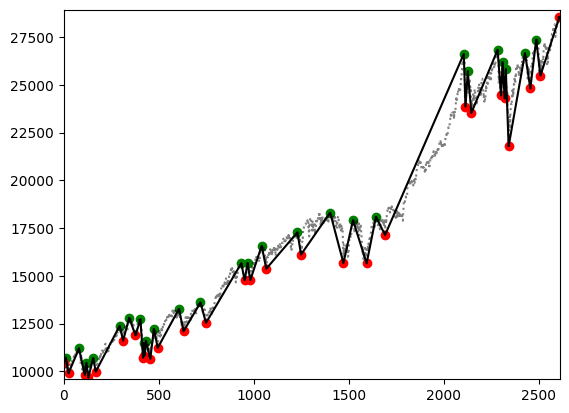

In [10]:
plot_pivots(sdf, pivots)

In [11]:
from segments import Segments

In [12]:
segments = Segments()
segments.calculate_segments(sdf, pivots)

In [13]:
segments.segments.head()

,date_1,date_2,value_1,value_2,delta_t,delta_v,num_positive_statements,num_negative_statements,statements_resulting
0,2010-01-01,2010-01-19,10428.05,10725.43,18 days,297.38,0,0,0
1,2010-01-19,2010-02-08,10725.43,9908.39,20 days,-817.04,0,0,0
2,2010-02-08,2010-04-26,9908.39,11205.03,77 days,1296.64,0,0,0
3,2010-04-26,2010-06-07,11205.03,9816.49,42 days,-1388.54,0,0,0
4,2010-06-07,2010-06-18,9816.49,10450.64,11 days,634.15,0,0,0


In [14]:
segments.set_statements_number(pd.Timestamp("2001-01-01"), 10)  # date is outside of available segments -> False

False

In [15]:
segments.set_statements_number(pd.Timestamp("2010-01-13"), 10)  # changes num_positive_statements in first (0) segment
segments.set_statements_number(pd.Timestamp("2010-01-19"), 10, "negative")  # changes num_positive_statements in first (0) segment

True

In [16]:
segments.segments.head()

,date_1,date_2,value_1,value_2,delta_t,delta_v,num_positive_statements,num_negative_statements,statements_resulting
0,2010-01-01,2010-01-19,10428.05,10725.43,18 days,297.38,10,0,10
1,2010-01-19,2010-02-08,10725.43,9908.39,20 days,-817.04,0,10,-10
2,2010-02-08,2010-04-26,9908.39,11205.03,77 days,1296.64,0,0,0
3,2010-04-26,2010-06-07,11205.03,9816.49,42 days,-1388.54,0,0,0
4,2010-06-07,2010-06-18,9816.49,10450.64,11 days,634.15,0,0,0


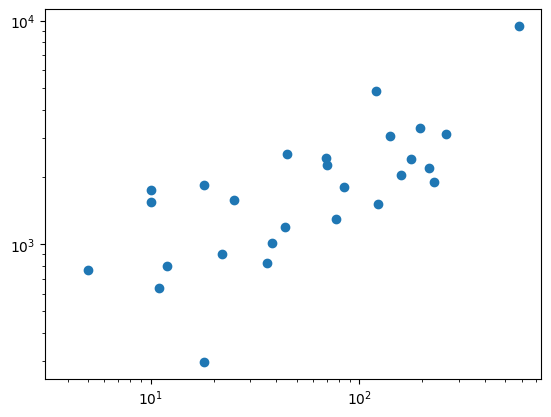

In [17]:
plt.scatter(segments.segments["delta_t"].dt.days, segments.segments["delta_v"], )
plt.yscale("log")
plt.xscale("log")
plt.show()